In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it
import math
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [3]:
# load data and drop state DC
data = pd.read_csv('solar_data.csv')
data = data[data.state != 'DC']
conventional = data.drop(['Unnamed: 0'],axis = 1)
conventional

,year,state,zipcode,cost_per_watt
0,1997,AR,72701,5.74
1,1997,AR,72034,9.77
2,1997,AR,72653,6.80
3,1997,AR,72753,2.14
4,1997,AR,72908,5.66
5,1997,CA,93534,4.67
6,1997,CA,94301,4.20
7,1997,CA,93012,7.68
8,1997,CA,95033,5.81
9,1997,CA,95054,5.60


In [3]:
# for loop used to check how many elements contained in specific year
yearlist = []
yearcount = []
for key, group in it.groupby(conventional.year):
    yearlist.append(key)
    yearcount.append(len(list(group)))
print(yearlist,yearcount)

[1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017] [41, 54, 288, 311, 1680, 3051, 4290, 6729, 6668, 11093, 19636, 20835, 34385, 51382, 48130, 65196, 27884, 34138, 83729, 176, 2]


In [5]:
# sort the conventional data by year and state 
# define the range of year and creat a statelist
conventional = conventional.sort(['year','state'])
a = conventional['year'].astype(str)
year = np.arange(1997, 2018)
statelist = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 
             'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 
             'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 
             'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
cost_avg = pd.DataFrame(columns = ['Year', 'States', 'Cost_Per_Watt'])


C:\Users\yongquan\Miniconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [11]:
# calculate the average solar cost by year and states
for i in range(len(year)):
    for j in range(len(statelist)):
        cost_avg.loc[i*len(statelist)+ j] = [str(year[i]), statelist[j], np.mean(conventional[a.str.contains(str(year[i]))][conventional.state == statelist[j]].cost_per_watt)]
cost_avg

C:\Users\yongquan\Miniconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


,Year,States,Cost_Per_Watt
0,1997,AK,NaN
1,1997,AL,NaN
2,1997,AR,6.022
3,1997,AZ,NaN
4,1997,CA,5.592
5,1997,CO,3.736
6,1997,CT,NaN
7,1997,DE,NaN
8,1997,FL,4.060
9,1997,GA,3.100


In [12]:
# drop the nan term
cost_avg.dropna(inplace=True)
cost_avg

,Year,States,Cost_Per_Watt
2,1997,AR,6.022000
4,1997,CA,5.592000
5,1997,CO,3.736000
8,1997,FL,4.060000
9,1997,GA,3.100000
13,1997,IL,8.350000
14,1997,IN,3.490000
19,1997,MD,6.560000
21,1997,MI,3.350000
22,1997,MN,5.715000


In [13]:
cost_avg.to_csv('solar_cost.csv')

In [17]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

C:\Users\yongquan\Miniconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


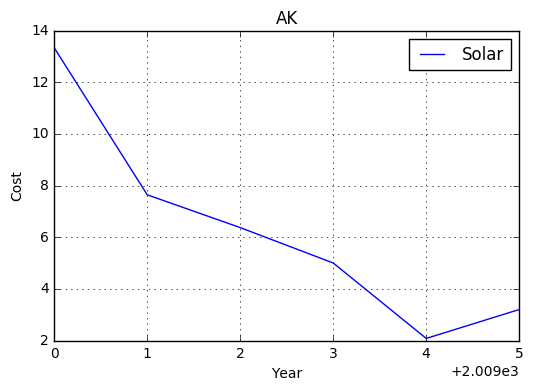

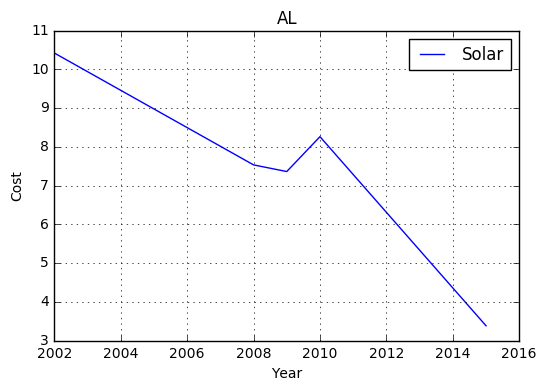

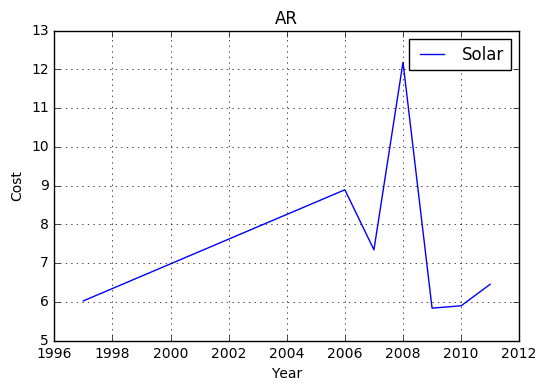

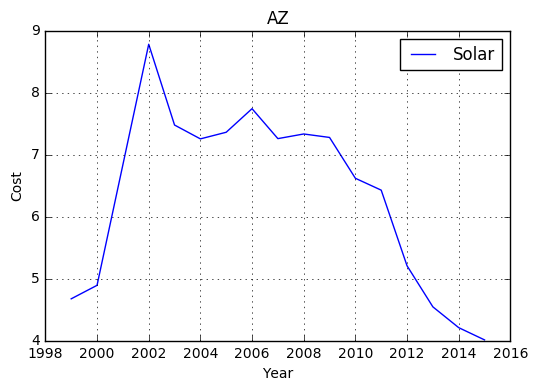

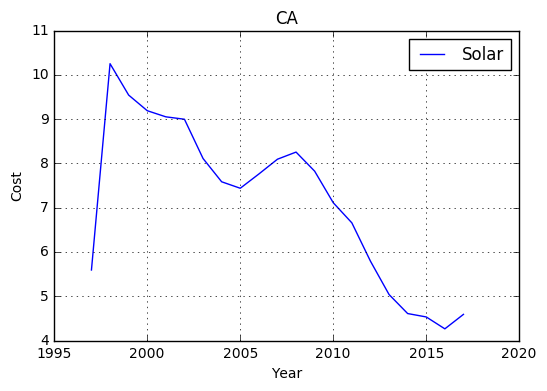

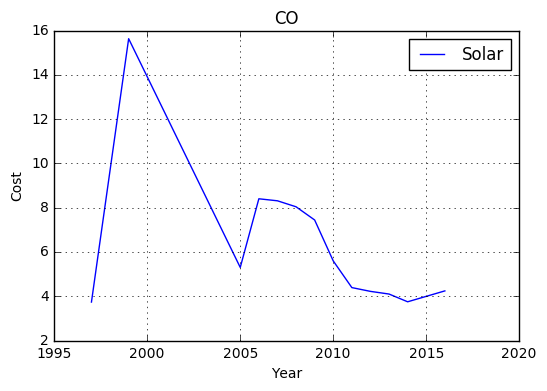

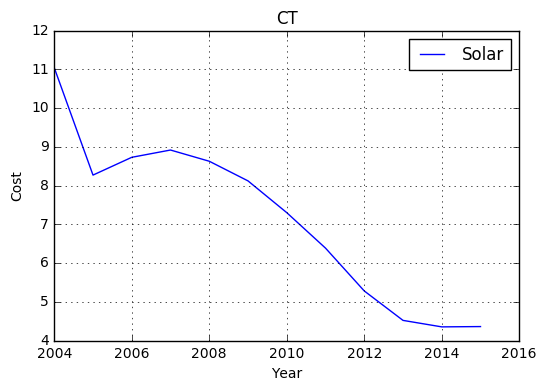

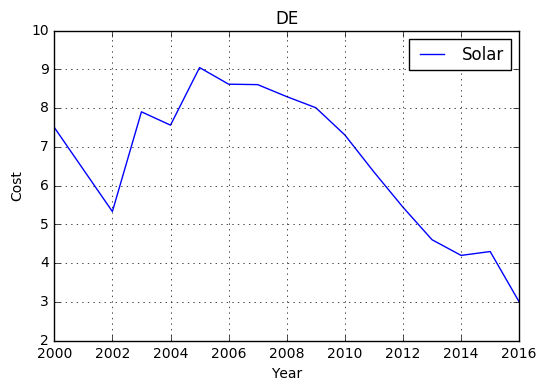

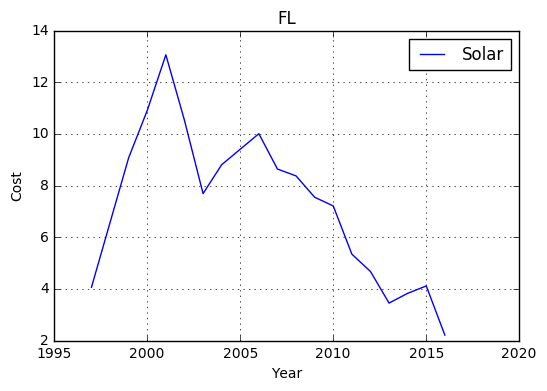

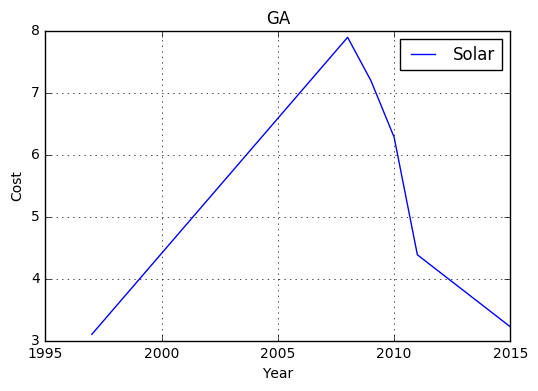

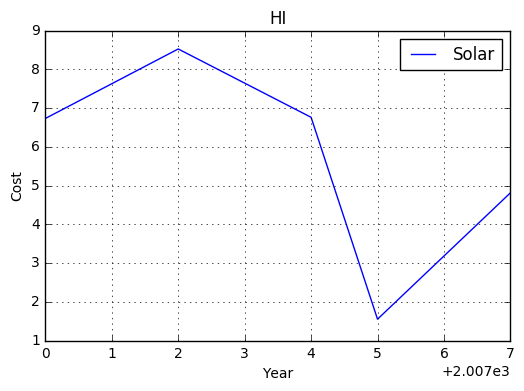

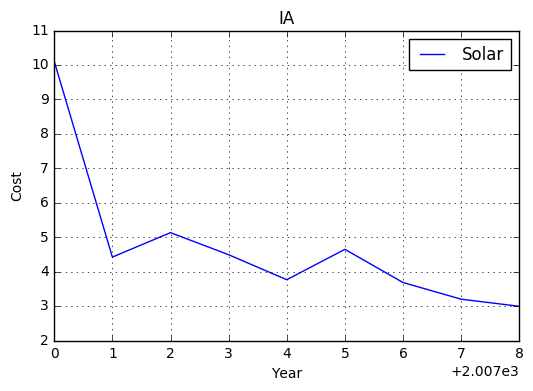

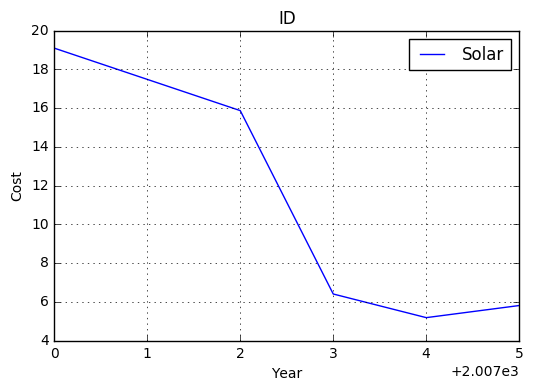

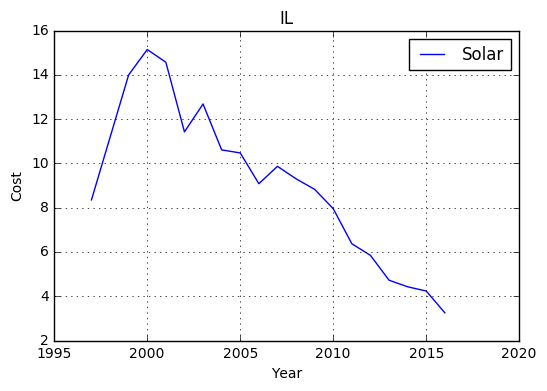

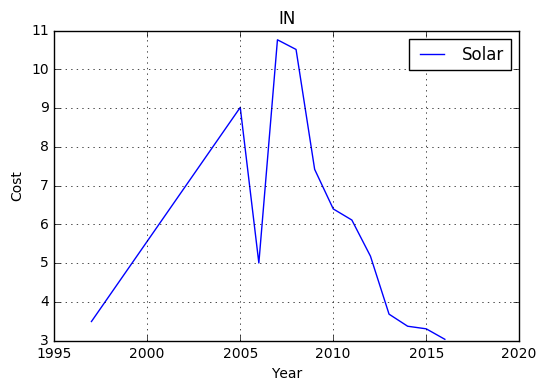

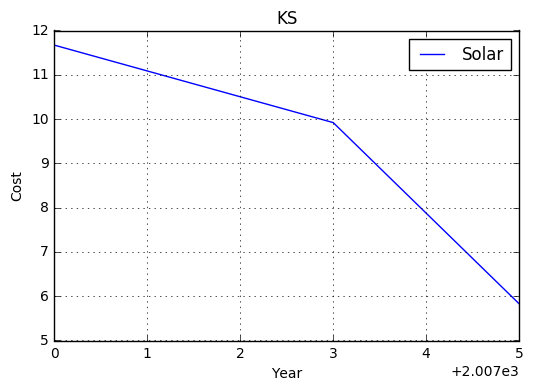

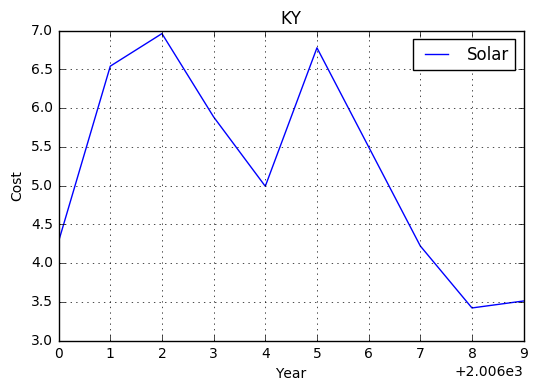

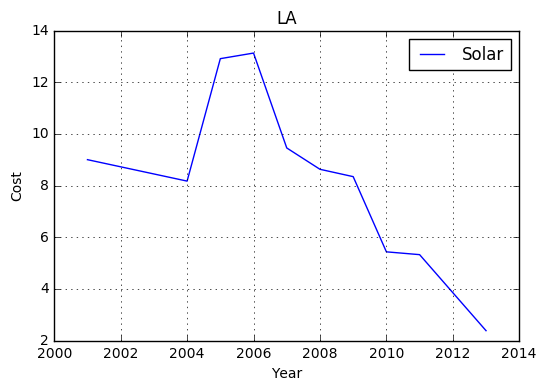

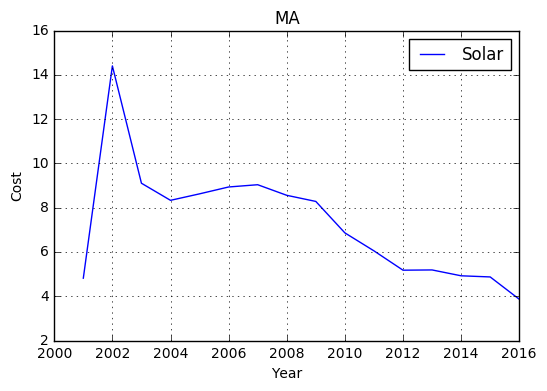

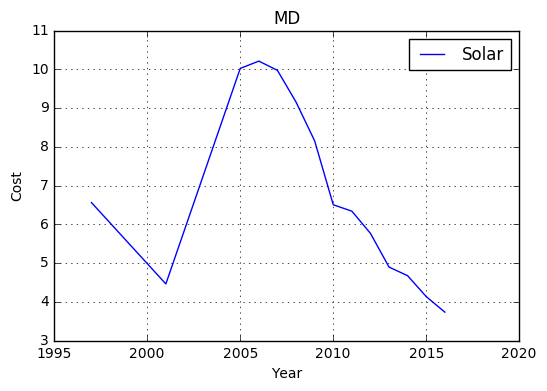

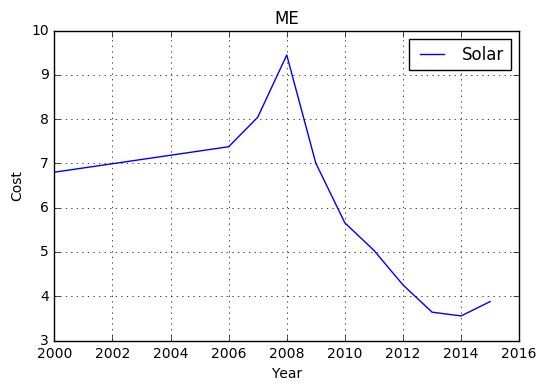

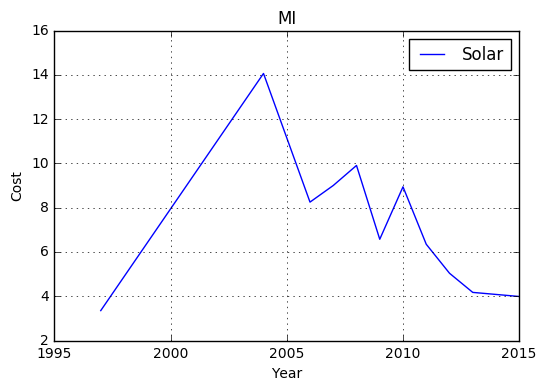

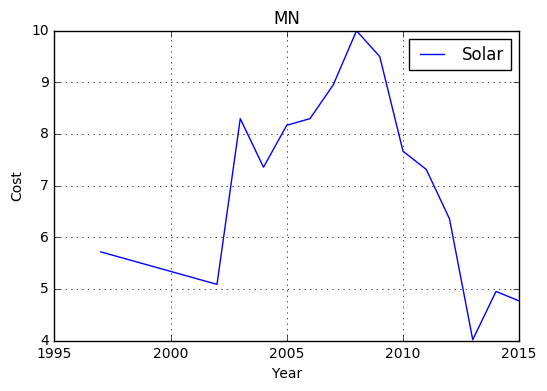

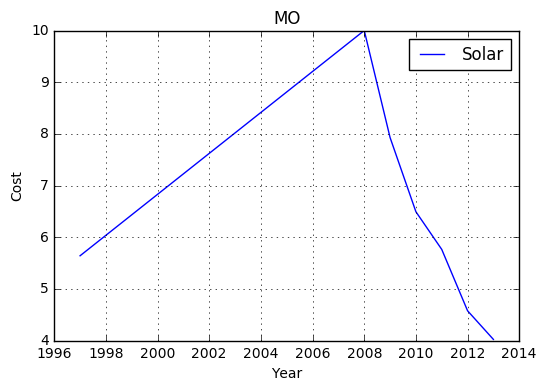

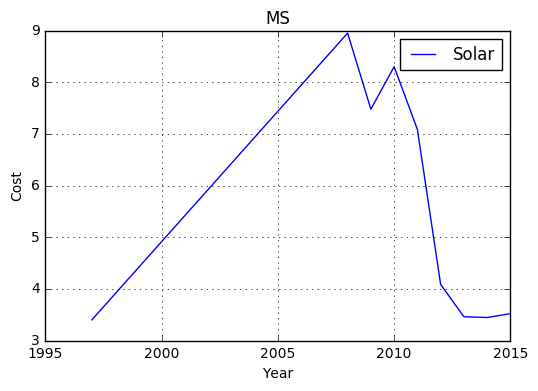

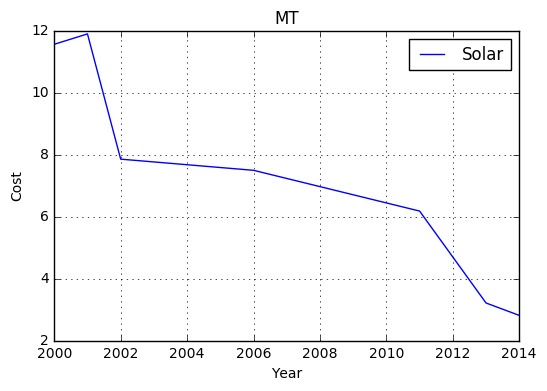

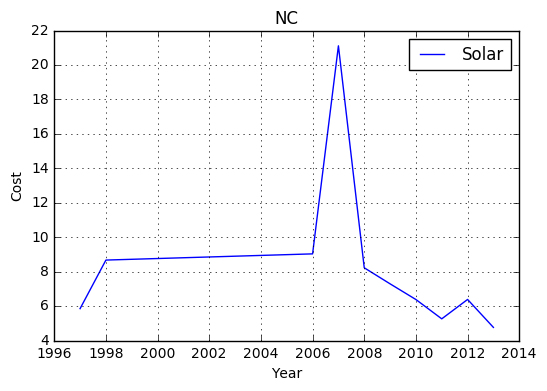

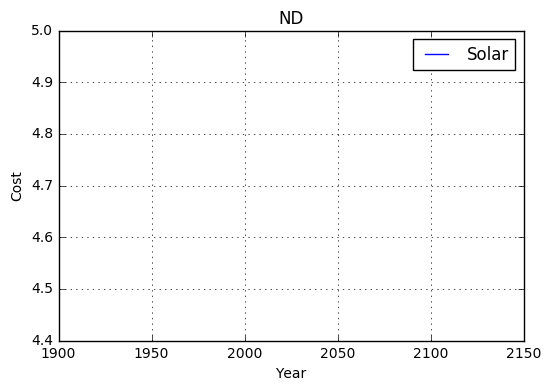

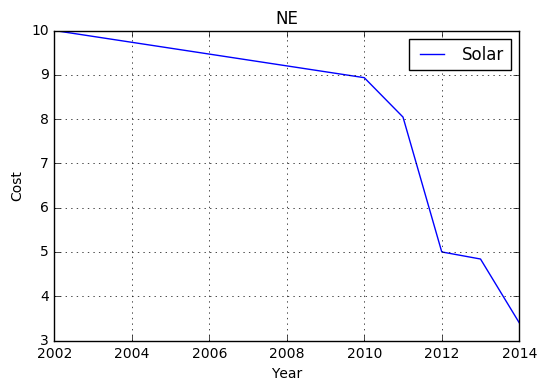

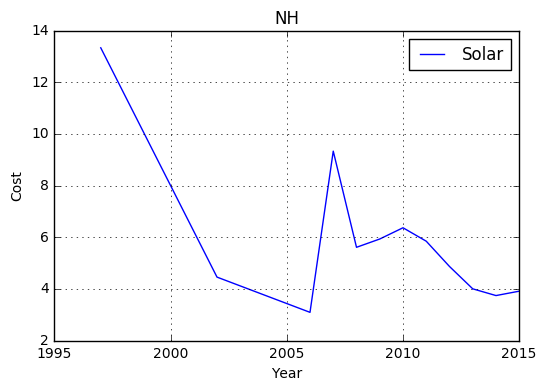

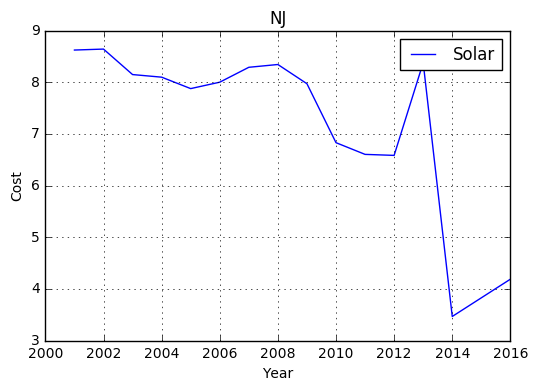

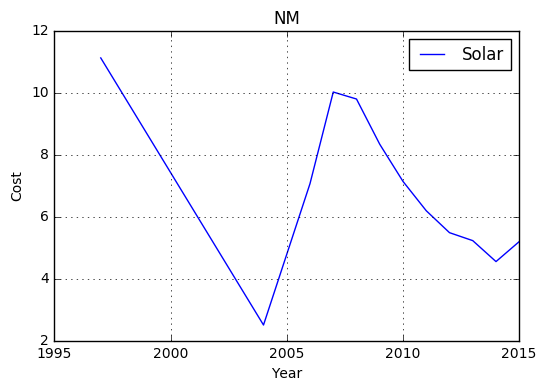

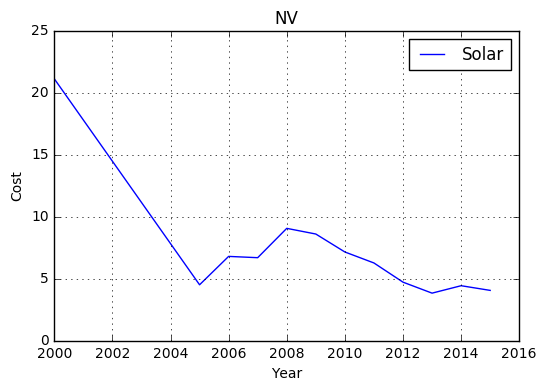

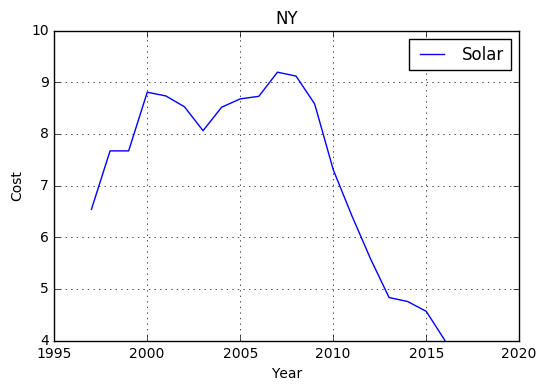

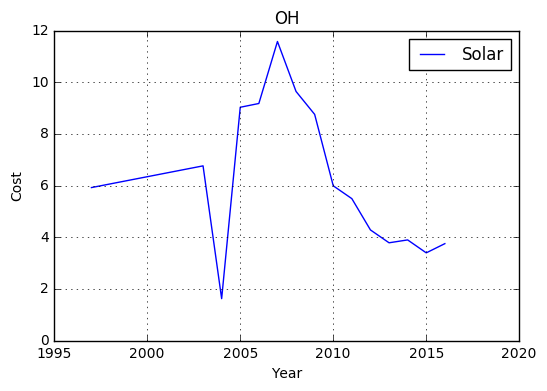

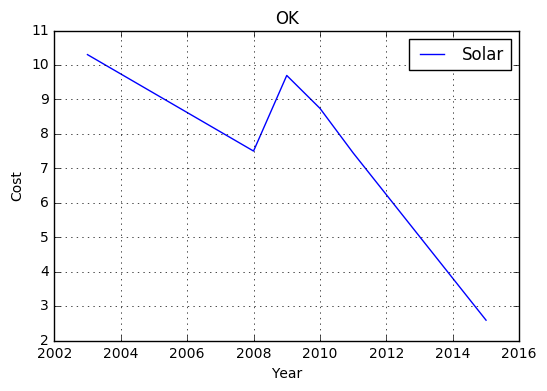

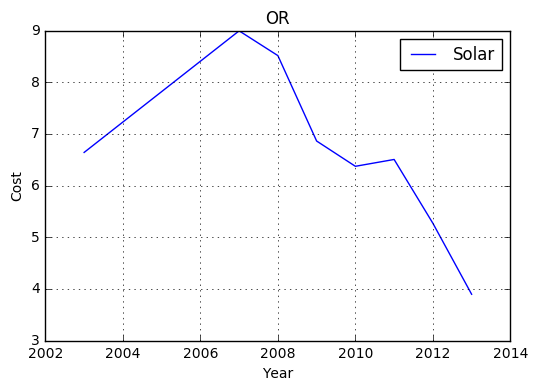

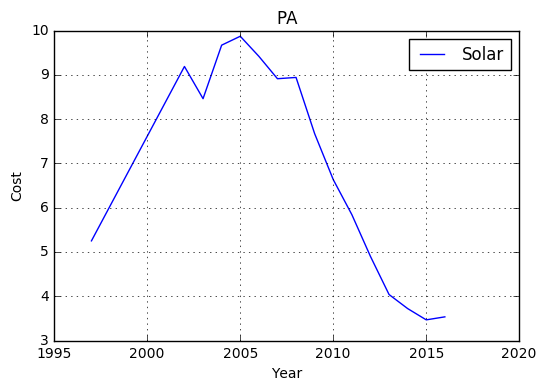

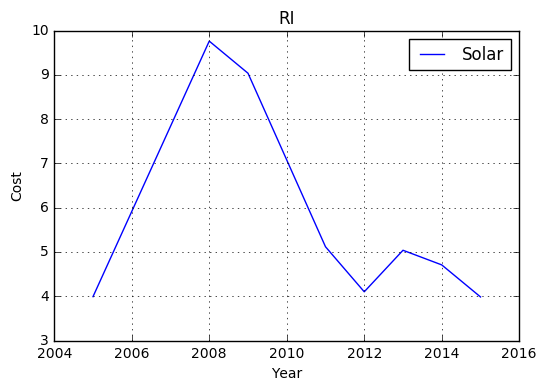

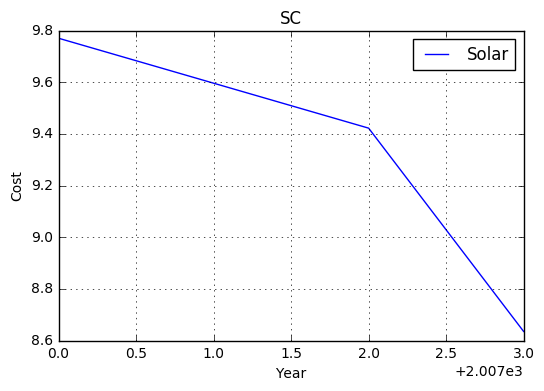

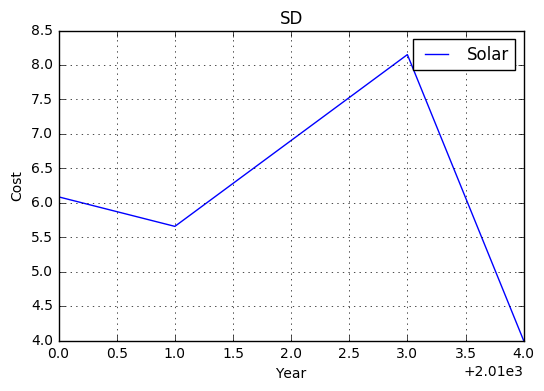

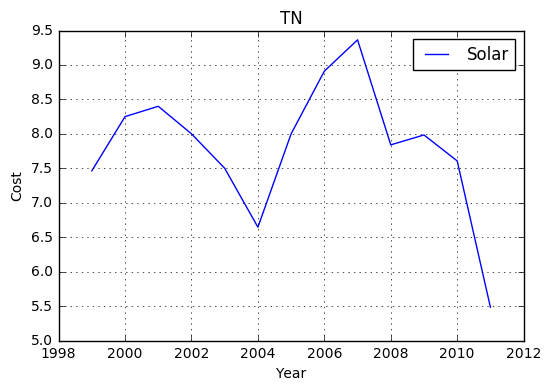

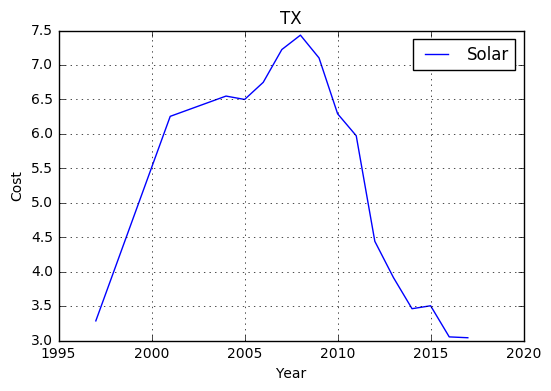

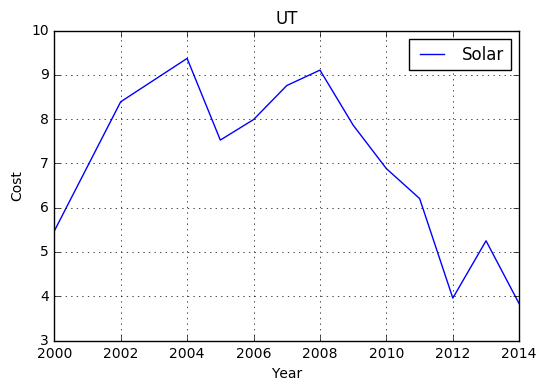

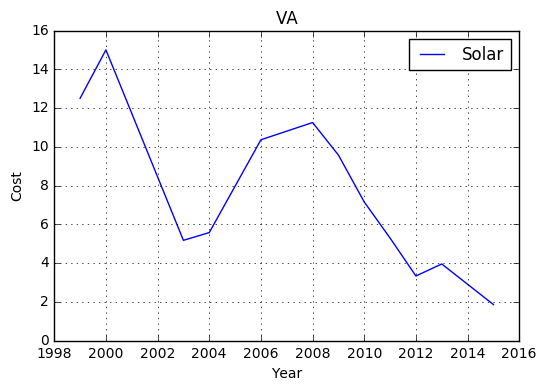

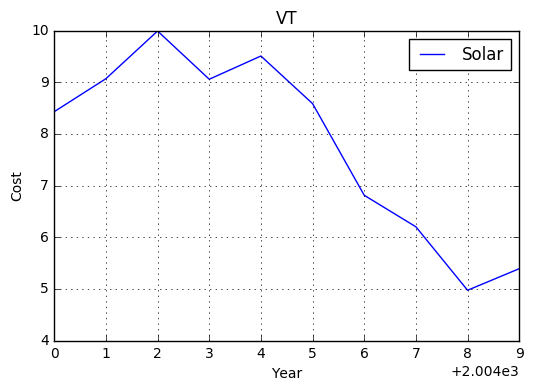

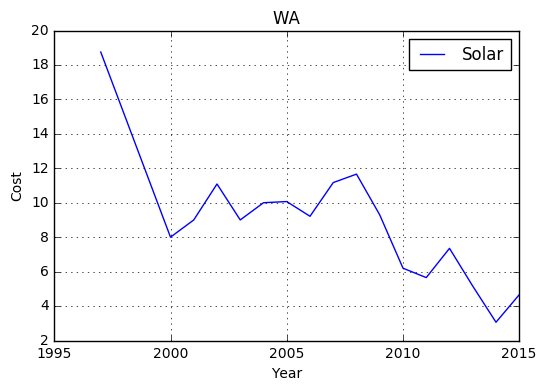

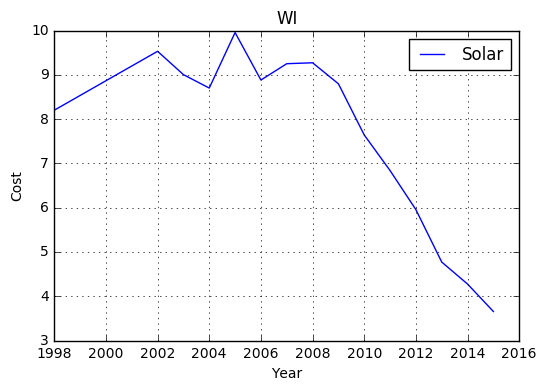

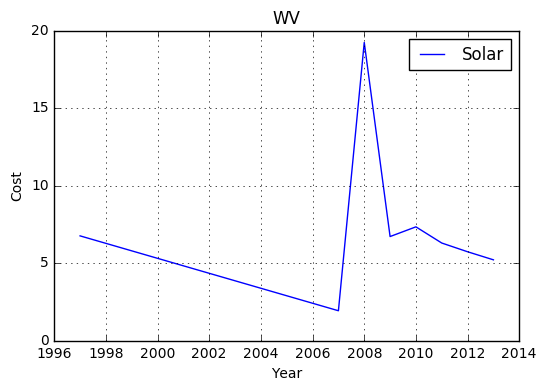

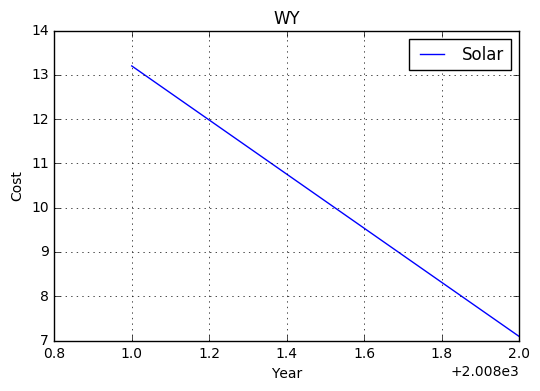

In [19]:
# for all states contained in statelist, make the plot of average cost vs year for solar power
for i in statelist:
    plt.figure(figsize = (6,4))
    plt.subplot(111)
    plt.plot(cost_avg[cost_avg.States == i].Year, cost_avg[cost_avg.States == i].Cost_Per_Watt, label = 'Solar')
    plt.xlabel('Year')
    plt.ylabel('Cost')
    plt.title(i)
    plt.grid()
    plt.legend()